# Spatial networks analysis
Preliminary analysis, missing one data file on analysis of distances before bridges construction.


In [2]:
from tqdm import tqdm
from sklearn.manifold import TSNE
from collections import defaultdict
#from fa2 import ForceAtlas2
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#from fitter import Fitter
from scipy.stats import pearsonr as pearson

import warnings
warnings.filterwarnings('ignore')
import math
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import ast
import networkx as nx

%matplotlib inline

In [8]:
#distance_matrix 
dm = pd.read_excel('distancesHungary.xlsx')

In [9]:
dm.head()

,Unnamed: 0,Budapest,Békéscsaba,Debrecen,Eger,Győr,Kaposvár,Kecskemét,Miskolc,Nyíregyháza,Pécs,Salgótarján,Szeged,Szekszárd,Szolnok,Szombathely,Székesfehérvár,Tatabánya,Veszprém,Zalaegerszeg
0,Budapest,NaN,204249.195522,230907.097080,129726.214912,123355.208008,185367.765158,84203.508008,183285.683535,230830.872564,199509.089461,110500.509336,170796.885961,145276.733542,104445.854118,222657.563633,63929.482699,63629.379983,113616.108954,230143.439384
1,Békéscsaba,204493.051515,NaN,134553.342586,187047.369418,322788.970514,381638.459664,121442.624514,236921.516040,181892.043070,299998.133966,303343.917841,96848.597467,245765.778048,109033.587624,422091.326138,260200.177205,263063.142489,309886.803460,426414.133890
2,Debrecen,231591.816073,134103.316586,NaN,129274.472976,354329.280072,416341.837222,180248.734072,113406.434598,49498.482880,445800.271524,232484.354399,229100.211025,391567.915606,126104.929181,453631.635696,294903.554763,294603.452046,344590.181017,461117.511447
3,Eger,129802.993990,187616.537503,130185.248060,NaN,252540.457989,314553.015139,203558.980989,82563.834515,130109.023545,344011.449441,62176.618108,290152.358942,289779.093523,105687.677098,351842.813613,193114.732680,192814.629963,242801.358934,359328.689364
4,Győr,123436.041001,321909.769514,353927.340072,252746.457904,NaN,215546.258150,201864.082000,306305.926526,353851.115556,303563.517452,233520.752327,288457.459953,249331.161534,229336.188110,100196.828624,85056.346698,65995.363975,78628.038946,138973.815376


In [20]:
# let us calculate distributions of distances between various cities 
dm.columns
matrix_dm = pd.DataFrame.to_numpy(dm)
#print(matrix_dm)

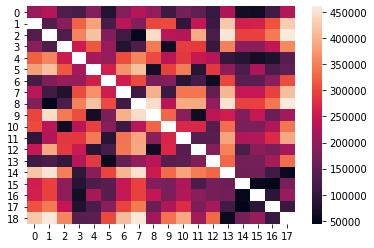

In [16]:
# first plot scatter plot for matrix 

#dm = dm.drop(dm.columns[[0]], axis=1)
#dm = dm.drop(dm.columns[[1]], axis=0)

# Default heatmap
p1 = sns.heatmap(matrix_dm)



<AxesSubplot:ylabel='Density'>

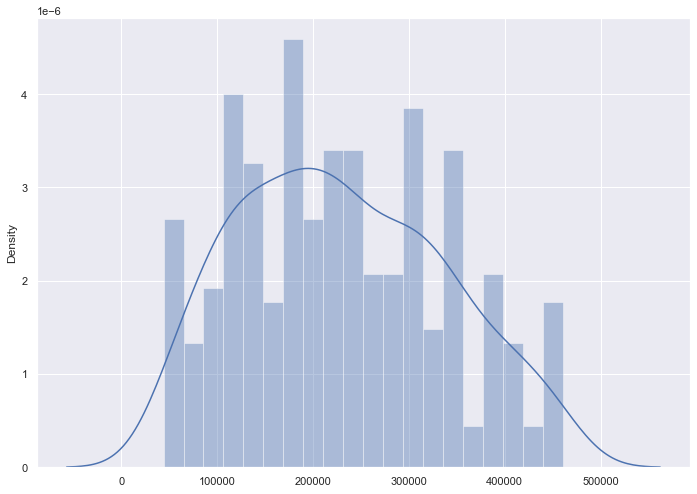

In [27]:
# plot distribution 
# some good example for plotting https://www.python-graph-gallery.com/20-basic-histogram-seaborn

flat_dist = matrix_dm.flatten()
#p2 = sns.jointplot(matrix_dm[0:,],matrix_dm[1:,], kind='scatter')

# Plot the histogram thanks to the distplot function
sns.distplot( flat_dist, hist=True, kde=True, bins =20, rug=False ) # need to divide by two...


# Compare distances distirbution before and after bridges construction

No handles with labels found to put in legend.


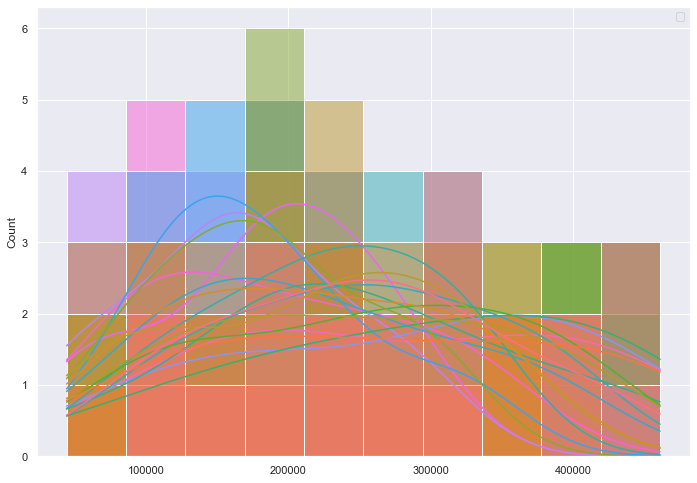

In [24]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

dmatrix_withoutbridges = ('distancesHungary_withoutbridges.xlsx')

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=dm, color="skyblue",  kde=True) #label="cities",

plt.legend() 
plt.show()

# Population vs. number of connections city has 

Population counts vs. $P_i = N_i^{\gamma},$ where $\gamma$ is usually country dependent index. 


In [10]:
import numpy as np
import scipy as sp
import pandas as pd
#import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import LogNorm
#import unidecode

import matplotlib as mpl
font = {        'size'   : 15}
mpl.rc('font', **font)

from mpl_toolkits.axes_grid1 import make_axes_locatable

cities_final = pd.read_csv('spatial_data/cities_final.csv')
cities_final.head()
print(cities_final.shape)
print('Number of unique cities ',np.size(np.unique(cities_final['CityName'])))


(2555, 5)
Number of unique cities  2555


Text(0.5, 0, 'values for each city')

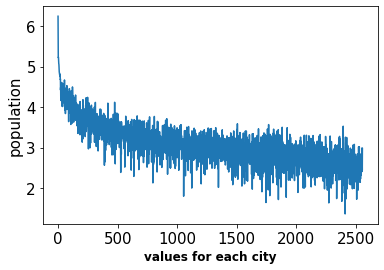

In [4]:
plt.plot(cities_final['PopLog'].values)
plt.ylabel('log population')
plt.xlabel('values for each city', fontsize=12,fontweight='bold')


# Plot cities on the map 
Here we also estimate and get all possible connections city has to other cities.

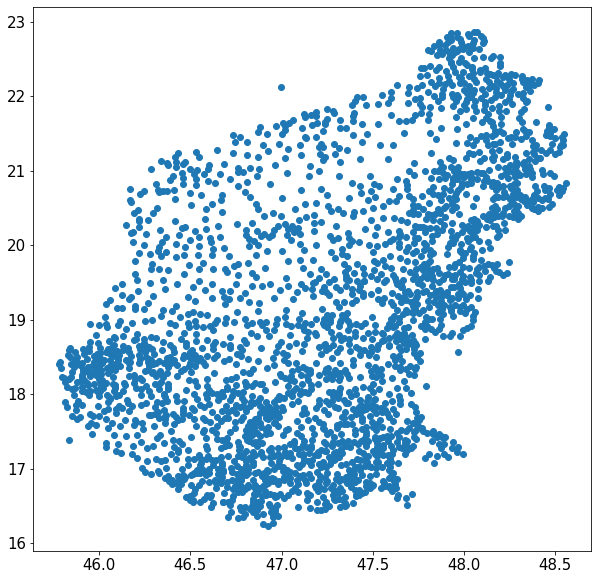

In [12]:
x = cities_final['Latitude']
y = cities_final['Longitude']


fig = plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.show()

# Detect transition in networks changing over time
Looked at what type of transition could happen in temporal networks:
- community structure (applied Loivan algorithm)
- spectral properties 



In [13]:
# load data 

#distance_matrix 
df_nets = pd.read_excel('cities_nets_output-all.xlsx')
df_nets.shape

df_nets.head()

,Unnamed: 0,Budapest,Békéscsaba,Debrecen,Eger,Győr,Kaposvár,Kecskemét,Miskolc,Nyíregyháza,Pécs,Salgótarján,Szeged,Szekszárd,Szolnok,Szombathely,Székesfehérvár,Tatabánya,Veszprém,Zalaegerszeg
0,Budapest,NaN,189614.205522,218669.273080,122776.320912,122068.731008,180035.797158,83750.581008,172582.673535,226524.151564,193454.443461,109108.796336,168210.928961,139963.529542,99022.212118,215436.123633,63560.665699,60099.530983,107262.832954,212031.847384
1,Békéscsaba,189829.338515,NaN,117965.385586,170962.502418,309614.384514,292637.313664,119652.521514,188742.616040,166701.496070,260880.493226,224463.522633,92785.433727,213180.952048,99742.713624,391791.266138,240688.630205,247645.184489,280964.009460,376101.886890
2,Debrecen,218697.810325,118216.530586,NaN,116095.567228,338663.421324,356641.958222,178733.664072,98981.062850,48736.110880,340109.990524,175746.860443,202510.503025,286619.076606,124786.453181,433516.189948,281640.732015,278179.597299,325342.899270,430111.913700
3,Eger,122857.196990,171453.203503,116119.614060,NaN,242822.807989,302275.250139,134860.185989,53391.591515,120794.482852,297623.488441,59907.742108,210211.578942,244132.574523,94527.519098,337675.576613,185800.118680,182338.983963,229502.285934,334271.300364
4,Győr,122013.335001,309825.333514,338573.344072,242680.391904,NaN,173097.790150,198976.349000,292486.744526,346428.222556,213001.418452,206634.946327,264285.597953,184801.833534,219233.340110,99161.590624,84513.135698,64038.238975,77845.828946,132435.699376


In [14]:

df_clean = df_nets.iloc[: , 1:]
df_clean.shape


(19, 19)

In [15]:
df_clean.head()

,Budapest,Békéscsaba,Debrecen,Eger,Győr,Kaposvár,Kecskemét,Miskolc,Nyíregyháza,Pécs,Salgótarján,Szeged,Szekszárd,Szolnok,Szombathely,Székesfehérvár,Tatabánya,Veszprém,Zalaegerszeg
0,NaN,189614.205522,218669.273080,122776.320912,122068.731008,180035.797158,83750.581008,172582.673535,226524.151564,193454.443461,109108.796336,168210.928961,139963.529542,99022.212118,215436.123633,63560.665699,60099.530983,107262.832954,212031.847384
1,189829.338515,NaN,117965.385586,170962.502418,309614.384514,292637.313664,119652.521514,188742.616040,166701.496070,260880.493226,224463.522633,92785.433727,213180.952048,99742.713624,391791.266138,240688.630205,247645.184489,280964.009460,376101.886890
2,218697.810325,118216.530586,NaN,116095.567228,338663.421324,356641.958222,178733.664072,98981.062850,48736.110880,340109.990524,175746.860443,202510.503025,286619.076606,124786.453181,433516.189948,281640.732015,278179.597299,325342.899270,430111.913700
3,122857.196990,171453.203503,116119.614060,NaN,242822.807989,302275.250139,134860.185989,53391.591515,120794.482852,297623.488441,59907.742108,210211.578942,244132.574523,94527.519098,337675.576613,185800.118680,182338.983963,229502.285934,334271.300364
4,122013.335001,309825.333514,338573.344072,242680.391904,NaN,173097.790150,198976.349000,292486.744526,346428.222556,213001.418452,206634.946327,264285.597953,184801.833534,219233.340110,99161.590624,84513.135698,64038.238975,77845.828946,132435.699376


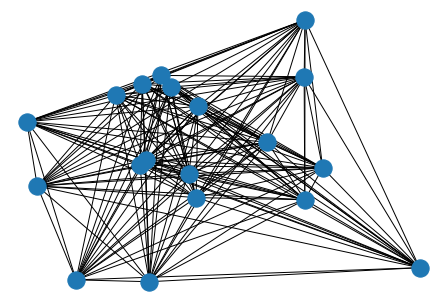

In [18]:
import networkx as nx



# cities adjacency matrix

#net_matrix = df_clean.to_numpy()

#print(net_matrix)

# create graph from

G = nx.from_numpy_matrix(net_matrix)

nx.draw(G)

In [23]:
#!pip install python-louvain

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for python-louvain, since package 'wheel' is not installed.
    Running setup.py install for python-louvain: started
    Running setup.py install for python-louvain: finished with status 'done'


You should consider upgrading via the 'c:\users\lyubo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


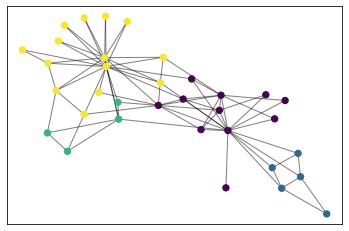

In [28]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

0.2556818181818182


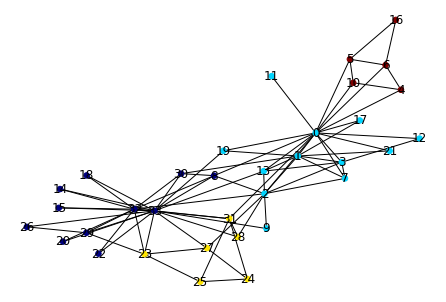

In [27]:
# Detect communities in data in temporal networks

from community import community_louvain
#import community
import matplotlib.pyplot as plt
import networkx as nx


trans = nx.transitivity(G)
print(trans)

# Find modularity
part = community_louvain.best_partition(G)
mod = community_louvain.modularity(part,G)

# Plot, color nodes using community structure
values = [part.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap=plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=True)
plt.show()